In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Branch_df = pd.read_csv('./Dataset/Clean/Branch_clean.csv')
Branch_df.head()

BranchID                        BranchName
0  BA15019  REG 1 - SPBU BANDA ACEH SUDIRMAN
1  BA61006         REG 6 - BANJARBARU DC LPG
2  BB31018        REG 3 - KOTA BANJAR DC LPG
3  BC61010           REG 6 - BALANGAN DC LPG
4  BD31029       REG 3 - BANDUNG DC LPG NPSO

In [3]:
Item_df = pd.read_csv('./Dataset/Clean/Item_clean.csv')
Item_df.head()

ItemID                       ItemName BaseUOM
0  00004102  LUX BAR SOFT TOUCH PINK 85 GR     PCS
1  00000004      SOFTEX SUPER DELUX MAXI 8     PCS
2  00000005            SOFTEX MAXI WINGS 8     PCS
3  00000006       NISSIN WAFER MILK 120 GR     PCS
4  00000007  CITRA H&B LOT TEH HIJAU 60 ML     PCS

In [4]:
Order_df = pd.read_csv('./Dataset/Clean/Order_clean.csv')
Order_df.head()

POSNo BranchID     POSDate          POSDateTime  \
0  BA15019-PS-240100001  BA15019  2024-01-02  2024-01-02 10:18:13   
1  BA15019-PS-240100002  BA15019  2024-01-03  2024-01-03 09:50:00   
2  BA15019-PS-240100003  BA15019  2024-01-04  2024-01-04 09:53:21   
3  BA15019-PS-240100004  BA15019  2024-01-05  2024-01-05 08:38:06   
4  BA15019-PS-240100005  BA15019  2024-01-08  2024-01-08 09:50:27   

   TotalDiscountAmount  TotalTaxAmount  TotalTransaction  Payment  Change  
0                    0          166886           1684000  1684000       0  
1                    0           29730            300000   300000       0  
2                    0            9910            100000   100000       0  
3                    0           29532            298000   298000       0  
4                    0          108218           1092000  1092000       0

In [5]:
OrderItem_df = pd.read_csv('./Dataset/Clean/OrderItem_clean.csv')
OrderItem_df.head()

ID                 POSNo    ItemID  Qty   COGS  Price  TaxRate  \
0  54484  JK32233-PS-230100001  00002809    1  11504  16500       11   
1  54485  JK32233-PS-230100001  00001594    1   1684   4500       11   
2  54486  JK32233-PS-230100002  00101167    1   4193   6500       11   
3  54487  JK32233-PS-230100003  00000065    1  11690  17500       11   
4  54488  JK32233-PS-230100003  00037168    1      0   2000       11   

   TaxAmount  Discount  Subtotal  
0       1635         0     16500  
1        446         0      4500  
2        644         0      6500  
3       1734         0     17500  
4        198         0      2000

In [6]:
Stock_df = pd.read_csv('./Dataset/Clean/Stock_clean.csv')
Stock_df.head()

BranchID    ItemID  QtyAvailable
0  BK32091  11103011             0
1  JK32233  12125407            11
2  BG32224  OMI01668             0
3  JK32017  13100046             0
4  JK32012  00002276            29

In [7]:
Merged_df = pd.merge(OrderItem_df, Order_df, on='POSNo')
Merged_df = pd.merge(Merged_df, Branch_df, on='BranchID', how='left')
Merged_df = pd.merge(Merged_df, Item_df, on='ItemID', how='left')
Merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687356 entries, 0 to 4687355
Data columns (total 21 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID                   int64 
 1   POSNo                object
 2   ItemID               object
 3   Qty                  int64 
 4   COGS                 int64 
 5   Price                int64 
 6   TaxRate              int64 
 7   TaxAmount            int64 
 8   Discount             int64 
 9   Subtotal             int64 
 10  BranchID             object
 11  POSDate              object
 12  POSDateTime          object
 13  TotalDiscountAmount  int64 
 14  TotalTaxAmount       int64 
 15  TotalTransaction     int64 
 16  Payment              int64 
 17  Change               int64 
 18  BranchName           object
 19  ItemName             object
 20  BaseUOM              object
dtypes: int64(13), object(8)
memory usage: 751.0+ MB


In [8]:
Daily_df = Merged_df.groupby(['BranchID','ItemID','POSDate']).agg({'Qty': 'sum'}).sort_values(by=['BranchID','ItemID']).reset_index()
Daily_df

BranchID    ItemID     POSDate  Qty
0        BA15019  00003408  2024-01-02    8
1        BA15019  00003408  2024-01-05    1
2        BA15019  00003408  2024-01-08    4
3        BA15019  00003408  2024-01-09    1
4        BA15019  00003408  2024-01-12    1
...          ...       ...         ...  ...
2413390  YK42089  00001874  2024-05-01    1
2413391  YK42089  00001874  2024-05-03   12
2413392  YK42089  00001874  2024-05-04   13
2413393  YK42089  00001874  2024-05-05   22
2413394  YK42089  00001874  2024-05-06   13

[2413395 rows x 4 columns]

In [9]:
branch_arr = []
item_arr = []
date_arr = []
grouped = Daily_df.groupby(['BranchID', 'ItemID'])
start_date = Daily_df['POSDate'].min()
end_date = Daily_df['POSDate'].max()
for (branch, item), group in grouped:
    dates = pd.date_range(start=start_date, end=end_date).tolist()
    branch_arr.extend([branch] * len(dates))
    item_arr.extend([item] * len(dates))
    date_arr.extend(dates)
    print(branch_arr[-1], item_arr[-1])
complete = pd.DataFrame({'BranchID': branch_arr, 'ItemID': item_arr, 'POSDate': date_arr})
complete

BA15019 00003408
BA15019 12500006
BA15019 12500007
BD32002 00000047
BD32002 00000065
BD32002 00000083
BD32002 00000139
BD32002 00000149
BD32002 00000154
BD32002 00000158
BD32002 00000231
BD32002 00000285
BD32002 00000412
BD32002 00000489
BD32002 00000494
BD32002 00000496
BD32002 00000497
BD32002 00000503
BD32002 00000504
BD32002 00000505
BD32002 00000639
BD32002 00000642
BD32002 00000668
BD32002 00000733
BD32002 00000838
BD32002 00000873
BD32002 00000971
BD32002 00001042
BD32002 00001043
BD32002 00001191
BD32002 00001203
BD32002 00001306
BD32002 00001378
BD32002 00001557
BD32002 00001559
BD32002 00001594
BD32002 00001603
BD32002 00001786
BD32002 00001824
BD32002 00001874
BD32002 00001875
BD32002 00001945
BD32002 00002025
BD32002 00002087
BD32002 00002144
BD32002 00002155
BD32002 00002188
BD32002 00002210
BD32002 00002273
BD32002 00002275
BD32002 00002276
BD32002 00002277
BD32002 00002279
BD32002 00002312
BD32002 00002356
BD32002 00002400
BD32002 00002483
BD32002 00002490
BD32002 000025

BranchID    ItemID    POSDate
0         BA15019  00003408 2023-01-02
1         BA15019  00003408 2023-01-03
2         BA15019  00003408 2023-01-04
3         BA15019  00003408 2023-01-05
4         BA15019  00003408 2023-01-06
...           ...       ...        ...
48164123  YK42089  00001874 2024-05-04
48164124  YK42089  00001874 2024-05-05
48164125  YK42089  00001874 2024-05-06
48164126  YK42089  00001874 2024-05-07
48164127  YK42089  00001874 2024-05-08

[48164128 rows x 3 columns]

In [10]:
Daily_complete = Daily_df.astype({'POSDate': 'datetime64[ns]'})
Daily_complete = pd.merge(Daily_complete, complete, on=['BranchID', 'ItemID', 'POSDate'], how='right')
Daily_complete = Daily_complete.fillna(0)
Daily_complete = Daily_complete.astype({'Qty': 'int64'})
Daily_complete

BranchID    ItemID    POSDate  Qty
0         BA15019  00003408 2023-01-02    0
1         BA15019  00003408 2023-01-03    0
2         BA15019  00003408 2023-01-04    0
3         BA15019  00003408 2023-01-05    0
4         BA15019  00003408 2023-01-06    0
...           ...       ...        ...  ...
48164123  YK42089  00001874 2024-05-04   13
48164124  YK42089  00001874 2024-05-05   22
48164125  YK42089  00001874 2024-05-06   13
48164126  YK42089  00001874 2024-05-07    0
48164127  YK42089  00001874 2024-05-08    0

[48164128 rows x 4 columns]

In [11]:
branch_arr = []
item_arr = []
date_arr = []
grouped = Daily_df.groupby(['BranchID', 'ItemID'])
for (branch, item), group in grouped:
    pos_dates = group['POSDate']
    start_date = pos_dates.min()
    end_date = pos_dates.max()
    dates = pd.date_range(start=start_date, end=end_date).tolist()
    branch_arr.extend([branch] * len(dates))
    item_arr.extend([item] * len(dates))
    date_arr.extend(dates)
    print(branch_arr[-1], item_arr[-1])
complete = pd.DataFrame({'BranchID': branch_arr, 'ItemID': item_arr, 'POSDate': date_arr})
complete

BA15019 00003408
BA15019 12500006
BA15019 12500007
BD32002 00000047
BD32002 00000065
BD32002 00000083
BD32002 00000139
BD32002 00000149
BD32002 00000154
BD32002 00000158
BD32002 00000231
BD32002 00000285
BD32002 00000412
BD32002 00000489
BD32002 00000494
BD32002 00000496
BD32002 00000497
BD32002 00000503
BD32002 00000504
BD32002 00000505
BD32002 00000639
BD32002 00000642
BD32002 00000668
BD32002 00000733
BD32002 00000838
BD32002 00000873
BD32002 00000971
BD32002 00001042
BD32002 00001043
BD32002 00001191
BD32002 00001203
BD32002 00001306
BD32002 00001378
BD32002 00001557
BD32002 00001559
BD32002 00001594
BD32002 00001603
BD32002 00001786
BD32002 00001824
BD32002 00001874
BD32002 00001875
BD32002 00001945
BD32002 00002025
BD32002 00002087
BD32002 00002144
BD32002 00002155
BD32002 00002188
BD32002 00002210
BD32002 00002273
BD32002 00002275
BD32002 00002276
BD32002 00002277
BD32002 00002279
BD32002 00002312
BD32002 00002356
BD32002 00002400
BD32002 00002483
BD32002 00002490
BD32002 000025

BranchID    ItemID    POSDate
0         BA15019  00003408 2024-01-02
1         BA15019  00003408 2024-01-03
2         BA15019  00003408 2024-01-04
3         BA15019  00003408 2024-01-05
4         BA15019  00003408 2024-01-06
...           ...       ...        ...
12336992  YK42089  00001874 2024-05-02
12336993  YK42089  00001874 2024-05-03
12336994  YK42089  00001874 2024-05-04
12336995  YK42089  00001874 2024-05-05
12336996  YK42089  00001874 2024-05-06

[12336997 rows x 3 columns]

In [12]:
Daily = Daily_df.astype({'POSDate': 'datetime64[ns]'})
Daily = pd.merge(Daily, complete, on=['BranchID', 'ItemID', 'POSDate'], how='right')
Daily = Daily.fillna(0)
Daily = Daily.astype({'Qty': 'int64'})
Daily

BranchID    ItemID    POSDate  Qty
0         BA15019  00003408 2024-01-02    8
1         BA15019  00003408 2024-01-03    0
2         BA15019  00003408 2024-01-04    0
3         BA15019  00003408 2024-01-05    1
4         BA15019  00003408 2024-01-06    0
...           ...       ...        ...  ...
12336992  YK42089  00001874 2024-05-02    0
12336993  YK42089  00001874 2024-05-03   12
12336994  YK42089  00001874 2024-05-04   13
12336995  YK42089  00001874 2024-05-05   22
12336996  YK42089  00001874 2024-05-06   13

[12336997 rows x 4 columns]

In [13]:
branch_arr = []
item_arr = []
date_arr = []
grouped = Daily_df.groupby(['BranchID', 'ItemID'])
end_date = Daily_df['POSDate'].max()
for (branch, item), group in grouped:
    start_date = group['POSDate'].min()
    dates = pd.date_range(start=start_date, end=end_date).tolist()
    branch_arr.extend([branch] * len(dates))
    item_arr.extend([item] * len(dates))
    date_arr.extend(dates)
    print(branch_arr[-1], item_arr[-1])
complete = pd.DataFrame({'BranchID': branch_arr, 'ItemID': item_arr, 'POSDate': date_arr})
complete

BA15019 00003408
BA15019 12500006
BA15019 12500007
BD32002 00000047
BD32002 00000065
BD32002 00000083
BD32002 00000139
BD32002 00000149
BD32002 00000154
BD32002 00000158
BD32002 00000231
BD32002 00000285
BD32002 00000412
BD32002 00000489
BD32002 00000494
BD32002 00000496
BD32002 00000497
BD32002 00000503
BD32002 00000504
BD32002 00000505
BD32002 00000639
BD32002 00000642
BD32002 00000668
BD32002 00000733
BD32002 00000838
BD32002 00000873
BD32002 00000971
BD32002 00001042
BD32002 00001043
BD32002 00001191
BD32002 00001203
BD32002 00001306
BD32002 00001378
BD32002 00001557
BD32002 00001559
BD32002 00001594
BD32002 00001603
BD32002 00001786
BD32002 00001824
BD32002 00001874
BD32002 00001875
BD32002 00001945
BD32002 00002025
BD32002 00002087
BD32002 00002144
BD32002 00002155
BD32002 00002188
BD32002 00002210
BD32002 00002273
BD32002 00002275
BD32002 00002276
BD32002 00002277
BD32002 00002279
BD32002 00002312
BD32002 00002356
BD32002 00002400
BD32002 00002483
BD32002 00002490
BD32002 000025

BranchID    ItemID    POSDate
0         BA15019  00003408 2024-01-02
1         BA15019  00003408 2024-01-03
2         BA15019  00003408 2024-01-04
3         BA15019  00003408 2024-01-05
4         BA15019  00003408 2024-01-06
...           ...       ...        ...
16201479  YK42089  00001874 2024-05-04
16201480  YK42089  00001874 2024-05-05
16201481  YK42089  00001874 2024-05-06
16201482  YK42089  00001874 2024-05-07
16201483  YK42089  00001874 2024-05-08

[16201484 rows x 3 columns]

In [14]:
Daily_end = Daily_df.astype({'POSDate': 'datetime64[ns]'})
Daily_end = pd.merge(Daily_end, complete, on=['BranchID', 'ItemID', 'POSDate'], how='right')
Daily_end = Daily_end.fillna(0)
Daily_end = Daily_end.astype({'Qty': 'int64'})
Daily_end

BranchID    ItemID    POSDate  Qty
0         BA15019  00003408 2024-01-02    8
1         BA15019  00003408 2024-01-03    0
2         BA15019  00003408 2024-01-04    0
3         BA15019  00003408 2024-01-05    1
4         BA15019  00003408 2024-01-06    0
...           ...       ...        ...  ...
16201479  YK42089  00001874 2024-05-04   13
16201480  YK42089  00001874 2024-05-05   22
16201481  YK42089  00001874 2024-05-06   13
16201482  YK42089  00001874 2024-05-07    0
16201483  YK42089  00001874 2024-05-08    0

[16201484 rows x 4 columns]

<Axes: xlabel='POSDate'>

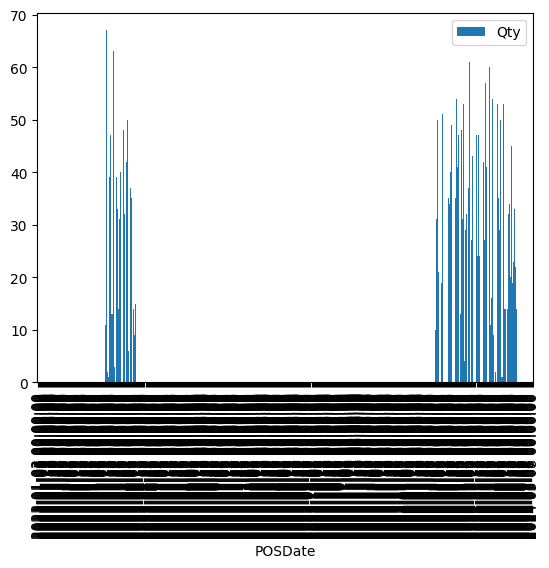

In [15]:
branch = 'BD32033'
item = '00001874'
to_plot = Daily_end[(Daily_end['BranchID'] == branch) & (Daily_end['ItemID'] == item)]
to_plot.plot(x='POSDate', y='Qty', kind='bar')